<a href="https://colab.research.google.com/github/edgarbarr1/colon-cancer-cnn/blob/main/colon_cancer_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colon Cancer #
### _Predicting the outcomes of colon cells to predict cancer_ ###

### Business Understanding ###
Colon cancer has been deemed the number 3 most common cancer in the world, according to the World Cancer Research Fund. Based on this statistic, it is not a surprise to know that more approximately 19 million colonoscopies are perfeormed each year in the United States.

Some experts believe that some of the main causes of this cancer is the Western food diet along with living a sedentary lifestyle as well as being obese. Unfortunately, according to the CDC, the US appears to be on an upward trend in obesity which in turn increses the likelihood of men and women to develop colorectal cancers.

Although the morttality rate for the most part appears to be relatively low (80% survival rate), it is important to note that like everything, there is always something to improve with either accurate test results, the time it takes to report those results and the resources available to compile said results.

Currently, as per the American Cancer Society, it takes 2-3 days to report the findings of a colonoscopy biopsy.

Objective
This notebook has the objective of finding out the population that is deeply affected by colon cancer and build a Convolutional Neural Network that can get close to the 1-2% accuracy that current tests. We will also strive to have an efficient model that can give accurate results faster than 2-3 days and ideally within the time frame of "same-day" results.

Before doing so, we will look at some mortality rates among different populations and determine whether the economic status of a population affects the mortality rate of colon cancer.



In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random

import PIL
import PIL.Image
import pathlib
# Packages to import and preprocess images
import glob
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Packages for our models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dropout
import seaborn as sns

# Model performance
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(tf.__version__)

2.5.0


Deleted all folders from zenodo except NORM which is normal and TUM which is the cancer cells

Inspiration for the function in the creation of the [directories](https://www.youtube.com/watch?v=_L2uYfVV48I)

In order to have class balance in the dataset we will be using a total of 24,000 images for our model training, 1,800 items for the validation, and 1,720 images for our test dataset to generate predictions. This brings our total of images used to 27,520 images used in this Convolutional Neural Network.

In [ ]:
# PIL.Image.open('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/NORM/NORM-AAAKGLVQ.tif')

In [ ]:
# os.listdir()

In [ ]:
# normal_image_count = len(list(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/NORM/*.tif')))
# cancer_image_count = len(list(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/TUM/*.tif')))
# print('Normal images: {}'.format(normal_image_count))
# print('Cancer images: {}'.format(cancer_image_count))

The images in the dataset are in TIF format. Let's convert the images into jpegs.

In [ ]:
# ell to convert the TIF images to jpeg

# paths = ['/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/NORM',
#          '/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/TUM']
# for path in paths:
#   for root, dirs, files in os.walk(path, topdown=False,):
#       for name in files:
#           print(os.path.join(root, name))
#           #if os.path.splitext(os.path.join(root, name))[1].lower() == ".tiff":
#           if os.path.splitext(os.path.join(root, name))[1].lower() == ".tif":
#               if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
#                   print ("A jpeg file already exists for %s" % name)
#               # If a jpeg with the name does *NOT* exist, convert one from the tif.
#               else:
#                   outputfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
#                   try:
#                       im = PIL.Image.open(os.path.join(root, name))
#                       print ("Converting jpeg for %s" % name)
#                       im.thumbnail(im.size)
#                       im.save(outputfile, "JPEG", quality=100)
#                   except Exception as e: 
#                     print(e)

# Jpegs have been converted. Now separate into subdirectories.

Now let's divide the images into subdirecotiries.

In [ ]:
# os.chdir('drive/MyDrive/colon_dataset')

In [ ]:
# os.listdir()

In [ ]:
# Makes the subdirecoteries for the training, validation, and testing data.
# if os.path.isdir('train/normal') is False:
#     os.makedirs('train/normal')
#     os.makedirs('train/cancer')
#     os.makedirs('validation/normal')
#     os.makedirs('validation/cancer')
#     os.makedirs('test/')

Currently we have Tif and jpeg duplicates in our directory. Now we will move the jpeg images to the newly created directories.

In [ ]:
# Run this code to move the images from the original dataset directory to the newly created dataset that the model will read.
# for image in random.sample(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/NORM/*.jpg'), 8000):
#   shutil.move(image, '/content/drive/MyDrive/colon_dataset/train/normal/')


# for image in random.sample(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/TUM/*.jpg'), 8000):
#   shutil.move(image, '/content/drive/MyDrive/colon_dataset/train/cancer/')


# for image in random.sample(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/NORM/*.jpg'), 400):
#   shutil.move(image, '/content/drive/MyDrive/colon_dataset/validation/normal/')


# for image in random.sample(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/TUM/*.jpg'), 400):
#   shutil.move(image, '/content/drive/MyDrive/colon_dataset/validation/cancer/')


# for image in random.sample(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/NORM/*.jpg'), 360):
#   shutil.move(image, '/content/drive/MyDrive/colon_dataset/test/')


# for image in random.sample(glob.glob('/content/drive/MyDrive/colon_dataset/NCT-CRC-HE-100K/TUM/*.jpg'), 360):
#   shutil.move(image, '/content/drive/MyDrive/colon_dataset/test/')

In [ ]:
# current_path_list = ['/content/drive/MyDrive/colon_dataset/validation',
#                      '/content/drive/MyDrive/colon_dataset/test',
#                      '/content/drive/MyDrive/colon_dataset/train']

# Image Data Generator #

In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = (0.85,1),
    brightness_range = [0.5, 1.0],
    horizontal_flip = True,
    rotation_range = 45
)

valid_data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    '/content/drive/MyDrive/colon_dataset/train',
    target_size = (224,224),
    batch_size = 10,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary',
    seed = 20
)
validation_generator = valid_data_gen.flow_from_directory(
    '/content/drive/MyDrive/colon_dataset/validation',
    target_size = (224,224),
    batch_size = 10,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary',
    seed = 20
)

Found 16000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# DataFrame to Save Model results

In [ ]:
performance_df = pd.DataFrame()

# Definining Callbacks

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2,
                           mode='auto')

# Model 1 #

Let's create our first model based on the data generator that we created above.

Our first model will be a rather simple one with the following layers:




1.   A convolutional layer with a (10,10) kernel size or the height and width of our convolutional window.
2.   A Max Pooling Layer that with a height and width of (5,5).
1.   A Dense Layer with a 64 output size
2.  










In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding='same', input_shape = (224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                12845088  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 12,845,537
Trainable params: 12,845,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Precision(), Recall(), 'accuracy'])

In [ ]:
history = model.fit(x = train_generator,
                    validation_data = validation_generator,
                    epochs = 10,
                    steps_per_epoch = 50,
                    callbacks = early_stop)

Epoch 1/10
50/50 [==============================] - 293s 6s/step - loss: 1.7378 - precision: 0.4674 - recall: 0.7458 - accuracy: 0.4700 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 110s 2s/step - loss: 0.6930 - precision: 0.5220 - recall: 1.0000 - accuracy: 0.5220 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 105s 2s/step - loss: 0.6929 - precision: 0.5280 - recall: 1.0000 - accuracy: 0.5280 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000 - val_accuracy: 0.5000


In [ ]:
model.save('drive/MyDrive/colon_dataset/baseline_model', save_format='h5')

In [ ]:
preds_train_1 = model.predict(train_generator, use_multiprocessing=True)
preds_val_1 = model.predict(validation_generator)

In [ ]:
model_metrics = model.evaluate(train_generator)
model_metrics

1600/1600 [==============================] - 253s 158ms/step - loss: 0.6932 - precision: 0.5000 - recall: 1.0000 - accuracy: 0.5000


[0.6931692957878113, 0.5, 1.0, 0.5]

In [ ]:
performance_df = pd.DataFrame(columns=['model', 'loss', 'precision', 'recall', 'accuracy'])
performance_df.loc[len(performance_df.index)] = ['model'] + model_metrics

In [ ]:
performance_df.head()

,model,loss,precision,recall,accuracy
0,model,0.693169,0.5,1.0,0.5


In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred,)
    
    ax= plt.subplot()
    # annot=True to annotate cells, fmt='g' to disable scientific notation
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='magma', linewidths=1, linecolor='black')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['NORMAL', 'CANCER'])
    ax.yaxis.set_ticklabels(['NORMAL', 'CANCER'])
    plt.show();

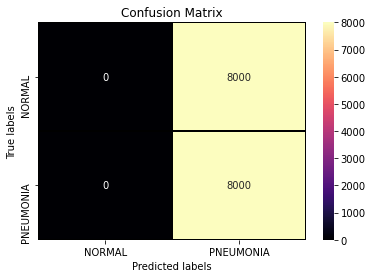

In [ ]:
plot_confusion_matrix(train_generator.labels, np.rint(preds_train_1))

As per the confusion matrix above, the model appears to be predicting NORMAL values only. This can be attributed to the fact that we have a very shallow Neural Network that is not able to pickup the very fine details of the images and therefore attributing every image as NORMAL.

In [ ]:
def visualize_training_results_1(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['recall'])
    ax1.plot(history.history['val_recall'])
    ax1.set_ylabel('Recall')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    ax3.plot(history.history['precision'])
    ax3.plot(history.history['val_precision'])
    ax3.set_ylabel('Precision')
    ax3.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()
    pass

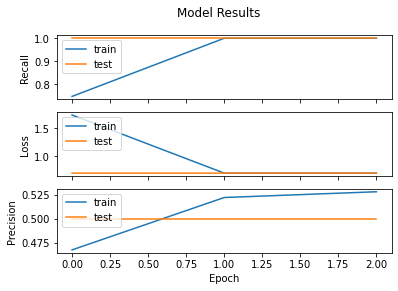

In [ ]:
visualize_training_results_1(history)

# Model 2 #

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(2,2), padding='valid', input_shape = (224,224,3)))
model_2.add(MaxPooling2D(2,2))
model_2.add(Conv2D(32, kernel_size=(2,2), padding='same', activation='relu'))
model_2.add(Conv2D(32, kernel_size=(2,2), padding='same', activation='relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(LeakyReLU(alpha=(.3)))
model_2.add(Dropout(.20))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 111, 111, 32)      4128      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 111, 111, 32)      4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Precision(), Recall(), 'accuracy'])

In [ ]:
history_2 = model_2.fit(
    x = train_generator,
    validation_data = validation_generator,
    epochs = 10,
    callbacks = early_stop,
    steps_per_epoch = 50
)

Epoch 1/10
50/50 [==============================] - 12s 227ms/step - loss: 0.8325 - precision_1: 0.5571 - recall_1: 0.7303 - accuracy: 0.5460 - val_loss: 0.6896 - val_precision_1: 0.5000 - val_recall_1: 1.0000 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 11s 215ms/step - loss: 0.6939 - precision_1: 0.5018 - recall_1: 0.5779 - accuracy: 0.5140 - val_loss: 0.6712 - val_precision_1: 0.5262 - val_recall_1: 0.9800 - val_accuracy: 0.5487
Epoch 3/10
50/50 [==============================] - 11s 217ms/step - loss: 0.6804 - precision_1: 0.5101 - recall_1: 0.7303 - accuracy: 0.5320 - val_loss: 0.8666 - val_precision_1: 0.5000 - val_recall_1: 1.0000 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 11s 218ms/step - loss: 0.7022 - precision_1: 0.3667 - recall_1: 0.0435 - accuracy: 0.4780 - val_loss: 0.6833 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.5000


In [ ]:
model_2.save('drive/MyDrive/colon_dataset/model_2', save_format='h5')

In [ ]:
preds_train_2 = model_2.predict(train_generator)
preds_val_2 = model_2.predict(validation_generator)

In [ ]:
model_metrics_2 = model_2.evaluate(validation_generator)
model_metrics_2

80/80 [==============================] - 3s 37ms/step - loss: 0.6833 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.5000


[0.6832504868507385, 0.0, 0.0, 0.5]

In [ ]:
performance_df.loc[len(performance_df.index)] = ['model_2'] + model_metrics_2

In [ ]:
performance_df

,model,loss,precision,recall,accuracy
0,model,0.693169,0.5,1.0,0.5
1,model_2,0.683250,0.0,0.0,0.5


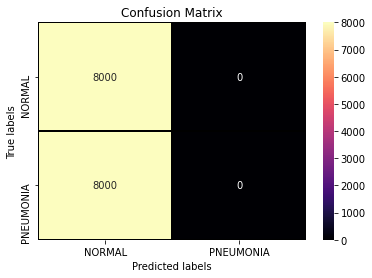

In [ ]:
plot_confusion_matrix(train_generator.labels, np.rint(preds_train_2))

In [ ]:
def visualize_training_results(history, iteration):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['recall_{}'.format(iteration)])
    ax1.plot(history.history['val_recall_{}'.format(iteration)])
    ax1.set_ylabel('Recall')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    ax3.plot(history.history['precision_{}'.format(iteration)])
    ax3.plot(history.history['val_precision_{}'.format(iteration)])
    ax3.set_ylabel('Precision')
    ax3.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()
    pass

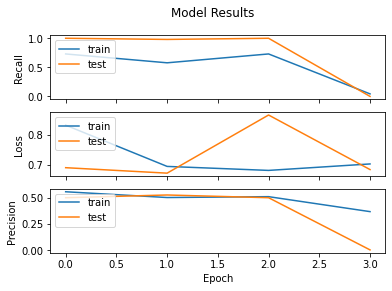

In [ ]:
visualize_training_results(history_2, 1)

# Model 3 #

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(2,2), activation='relu',padding='valid', input_shape = (224,224,3)))
model_3.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding='valid'))
model_3.add(Conv2D(64, kernel_size=(2,2), padding='same', activation=LeakyReLU()))
model_3.add(MaxPooling2D(3,3))
model_3.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(Conv2D(64, kernel_size=(3,3), padding='same', activation=LeakyReLU()))
model_3.add(MaxPooling2D(2,2))
model_3.add(Conv2D(64, kernel_size=(3,3), activation=LeakyReLU(), padding='valid'))
model_3.add(Flatten())
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(64, activation=LeakyReLU()))
model_3.add(Dropout(.20))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(64, activation=LeakyReLU()))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 223, 223, 32)      416       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 222, 222, 32)      4128      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 222, 222, 64)      8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 74, 74, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 74, 74, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 64)       

In [ ]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Precision(), Recall(), 'accuracy'])

In [ ]:
history_3 = model_3.fit(x=train_generator,
            validation_data = validation_generator,
            epochs=15,
            steps_per_epoch = 100)

Epoch 1/15
100/100 [==============================] - 21s 195ms/step - loss: 0.7016 - precision_2: 0.4699 - recall_2: 0.4840 - accuracy: 0.4690 - val_loss: 0.6950 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 19s 193ms/step - loss: 0.6965 - precision_2: 0.4751 - recall_2: 0.3411 - accuracy: 0.5080 - val_loss: 0.6974 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/15
100/100 [==============================] - 19s 193ms/step - loss: 0.7011 - precision_2: 0.5043 - recall_2: 0.4531 - accuracy: 0.4920 - val_loss: 0.7041 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/15
100/100 [==============================] - 19s 192ms/step - loss: 0.6982 - precision_2: 0.4988 - recall_2: 0.4143 - accuracy: 0.5090 - val_loss: 0.6932 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/15
100/100 [========

In [ ]:
model_3.save('drive/MyDrive/colon_dataset/model_3', save_format='h5')

In [ ]:
model_metrics_3 = model_3.evaluate(validation_generator)
model_metrics_3

80/80 [==============================] - 3s 37ms/step - loss: 0.6935 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - accuracy: 0.5000


[0.6934548020362854, 0.0, 0.0, 0.5]

In [ ]:
performance_df.loc[len(performance_df.index)] = ['model_3'] + model_metrics_3

In [ ]:
performance_df

,model,loss,precision,recall,accuracy
0,model,0.693169,0.5,1.0,0.5
1,model_2,0.683250,0.0,0.0,0.5
2,model_3,0.683250,0.0,0.0,0.5
3,model_3,0.693455,0.0,0.0,0.5


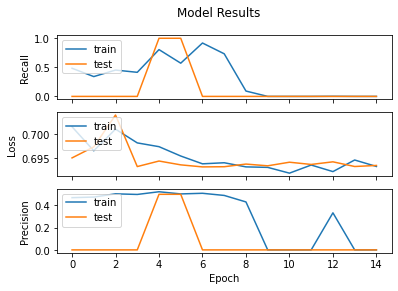

In [ ]:
visualize_training_results(history_3, 2)

# ResNet

In [ ]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
resnet_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/drive/MyDrive/colon_dataset/train',
    target_size = (224,224),
    batch_size = 10,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary',
    seed = 20
)
resnet_val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/drive/MyDrive/colon_dataset/validation',
    target_size = (224,224),
    batch_size = 10,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary',
    seed = 20
)

Found 16000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model_4 = Sequential()

resnet_model = ResNet50(weights = 'imagenet',
                        include_top = False,
                        pooling= 'avg')

model_4.add(resnet_model)
model_4.add(Dense(1, activation='sigmoid'))
for layer in resnet_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
sgd = SGD(learning_rate=0.001)
model_4.compile(optimizer=sgd,loss='binary_crossentropy',metrics = [Precision(),Recall(), 'accuracy'])
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint('resnet.h5',
                             save_best_only = True,
                             monitor = 'val_loss')

In [ ]:
history_resnet = model_4.fit(x = resnet_gen,
                             validation_data = resnet_val_gen,
                             steps_per_epoch = (resnet_gen.n//20),
                             validation_steps = (resnet_val_gen.n//20),
                             epochs = 5,
                             callbacks = checkpoint)

Epoch 1/5
800/800 [==============================] - 5031s 6s/step - loss: 0.6770 - precision_2: 0.5709 - recall_2: 0.5287 - accuracy: 0.5742 - val_loss: 0.6580 - val_precision_2: 0.5374 - val_recall_2: 0.9853 - val_accuracy: 0.5600


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
800/800 [==============================] - 2550s 3s/step - loss: 0.6486 - precision_2: 0.6482 - recall_2: 0.6361 - accuracy: 0.6407 - val_loss: 0.6363 - val_precision_2: 0.7425 - val_recall_2: 0.5877 - val_accuracy: 0.6750
Epoch 3/5
800/800 [==============================] - 1224s 2s/step - loss: 0.6285 - precision_2: 0.6814 - recall_2: 0.6092 - accuracy: 0.6635 - val_loss: 0.6169 - val_precision_2: 0.6906 - val_recall_2: 0.6378 - val_accuracy: 0.6825
Epoch 4/5
800/800 [==============================] - 650s 812ms/step - loss: 0.6158 - precision_2: 0.6993 - recall_2: 0.6099 - accuracy: 0.6775 - val_loss: 0.6218 - val_precision_2: 0.8269 - val_recall_2: 0.4343 - val_accuracy: 0.6750
Epoch 5/5
800/800 [==============================] - 337s 421ms/step - loss: 0.6057 - precision_2: 0.7067 - recall_2: 0.6185 - accuracy: 0.6842 - val_loss: 0.5970 - val_precision_2: 0.7486 - val_recall_2: 0.6569 - val_accuracy: 0.7125


In [ ]:
for layer in resnet_model.layers:
  layer.trainable = True

In [ ]:
sgd = SGD(learning_rate=0.01)

model_4.compile(optimizer=sgd,
                loss = 'binary_crossentropy',
                metrics = [Precision(), Recall(), 'accuracy'])
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint('drive/MyDrive/colon_dataset/resnet_checkpoint.h5',
                             save_best_only = True,
                             monitor = 'val_loss')

In [ ]:
history_resnet_unfrozen = model_4.fit(x = resnet_gen,
                                      validation_data = resnet_val_gen,
                                      epochs = 15,
                                      steps_per_epoch = (resnet_gen.n//20),
                                      validation_steps = (resnet_val_gen.n//20),
                                      callbacks = checkpoint)

Epoch 1/15
800/800 [==============================] - 199s 243ms/step - loss: 0.1142 - precision_4: 0.9533 - recall_4: 0.9571 - accuracy: 0.9548 - val_loss: 1.2482 - val_precision_4: 0.5607 - val_recall_4: 1.0000 - val_accuracy: 0.5750


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
800/800 [==============================] - 127s 158ms/step - loss: 0.0497 - precision_4: 0.9841 - recall_4: 0.9851 - accuracy: 0.9845 - val_loss: 0.1083 - val_precision_4: 1.0000 - val_recall_4: 0.9286 - val_accuracy: 0.9650
Epoch 3/15
800/800 [==============================] - 90s 112ms/step - loss: 0.0377 - precision_4: 0.9893 - recall_4: 0.9866 - accuracy: 0.9879 - val_loss: 0.0136 - val_precision_4: 0.9948 - val_recall_4: 0.9948 - val_accuracy: 0.9950
Epoch 4/15
800/800 [==============================] - 75s 94ms/step - loss: 0.0241 - precision_4: 0.9924 - recall_4: 0.9914 - accuracy: 0.9920 - val_loss: 0.2927 - val_precision_4: 1.0000 - val_recall_4: 0.7583 - val_accuracy: 0.8725
Epoch 5/15
800/800 [==============================] - 64s 81ms/step - loss: 0.0182 - precision_4: 0.9940 - recall_4: 0.9948 - accuracy: 0.9944 - val_loss: 0.0717 - val_precision_4: 0.9950 - val_recall_4: 0.9755 - val_accuracy: 0.9850
Epoch 6/15
800/800 [==============================] - 64s 80m

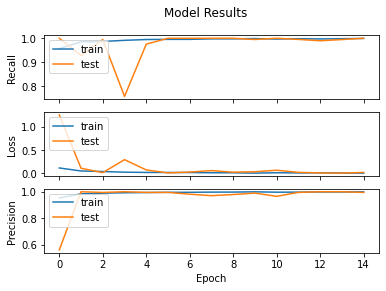

In [ ]:
visualize_training_results(history_resnet_unfrozen, 4)

In [ ]:
resnet_train_eval_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    '/content/drive/MyDrive/colon_dataset/train',
    color_mode='rgb',    # 3 channels
    target_size=(224,224), 
    batch_size=20,
    seed=20,
    shuffle=False
)
resnet_validation_eval_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    '/content/drive/MyDrive/colon_dataset/validation',
    color_mode='rgb',    # 3 channels
    target_size=(224,224), 
    batch_size=20,
    seed=20,
    shuffle=False   
)

Found 16000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
preds_train_resnet = model_4.predict(resnet_train_eval_generator, verbose=1)
preds_val_resnet = model_4.predict(resnet_validation_eval_generator, verbose=1)

40/40 [==============================] - 2s 56ms/step


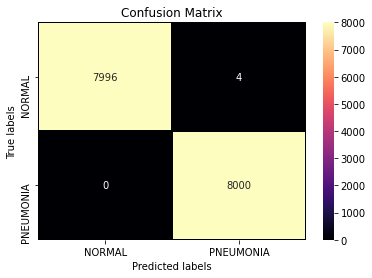

In [ ]:
plot_confusion_matrix(resnet_train_eval_generator.labels, np.rint(preds_train_resnet))